## MaxCut

In [1]:
from QHyper.problems.max_cut import MaxCut, MaxCutProblem


max_cut = MaxCut()
max_cut.create_sample_graph()

max_cut_problem = MaxCutProblem(max_cut)
print(max_cut_problem.objective_function)

2*x0*x1 + 2*x0*x2 - 2*x0 + 2*x1*x3 - 2*x1 + 2*x2*x3 + 2*x2*x4 - 3*x2 + 2*x3*x4 - 3*x3 - 2*x4


##### DQM

In [2]:
from QHyper.solvers.dqm import DQM


max_cut_dqm = DQM(max_cut_problem, 5)
max_cut_sampleset = max_cut_dqm.solve()

In [3]:
res = max_cut_sampleset.first.sample

In [4]:
res

{'x0': 1, 'x1': 0, 'x2': 0, 'x3': 1, 'x4': 1}

{1: 1, 2: 0, 3: 0, 4: 1, 5: 1}

Your plot is saved to ./demo_output/maxcut_dqm_plot.png


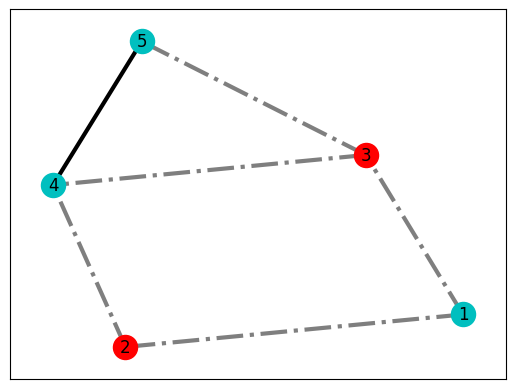

In [5]:
import networkx as nx
from matplotlib import pyplot as plt


plt.cla()

G = max_cut_problem.max_cut_graph
S0 = [i + 1 for i, val in enumerate(res.values()) if val == 0]
S1 = [i + 1 for i, val in enumerate(res.values()) if val == 1]
lut = {i + 1: val for i, val in enumerate(res.values())}
print(lut)
cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color="r")
nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color="c")
nx.draw_networkx_edges(
    G, pos, edgelist=cut_edges, style="dashdot", alpha=0.5, width=3
)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style="solid", width=3)
nx.draw_networkx_labels(G, pos)

filename = "./demo_output/maxcut_dqm_plot.png"
plt.savefig(filename, bbox_inches="tight")
print("\nYour plot is saved to {}".format(filename))
plt.show()

##### CQM

In [6]:
from QHyper.solvers.cqm import CQM


max_cut_cqm = CQM(max_cut_problem, 5)
max_cut_samples = max_cut_cqm.solve()

In [7]:
max_cut_samples

{'x0': 0.0, 'x1': 1.0, 'x2': 1.0, 'x3': 0.0, 'x4': 1.0}

{1: 0.0, 2: 1.0, 3: 1.0, 4: 0.0, 5: 1.0}

Your plot is saved to ./demo_output/maxcut_cqm_plot.png


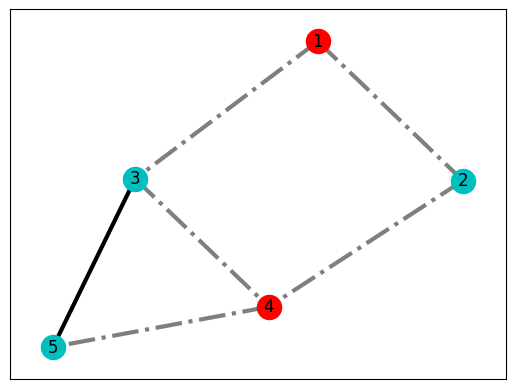

In [8]:
import networkx as nx
from matplotlib import pyplot as plt


plt.cla()

G = max_cut_problem.max_cut_graph
S0 = [i + 1 for i, val in enumerate(max_cut_samples.values()) if val == 0]
S1 = [i + 1 for i, val in enumerate(max_cut_samples.values()) if val == 1]
lut = {i + 1: val for i, val in enumerate(max_cut_samples.values())}
print(lut)
cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color="r")
nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color="c")
nx.draw_networkx_edges(
    G, pos, edgelist=cut_edges, style="dashdot", alpha=0.5, width=3
)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style="solid", width=3)
nx.draw_networkx_labels(G, pos)

filename = "./demo_output/maxcut_cqm_plot.png"
plt.savefig(filename, bbox_inches="tight")
print("\nYour plot is saved to {}".format(filename))
plt.show()

##### QUBO experiments

In [ ]:
from QHyper.solvers.converter import Converter


cut_qubo = Converter.to_qubo(max_cut_problem)

In [ ]:
cut_qubo

In [ ]:
import dimod


binary_polynomial = dimod.BinaryPolynomial(
    max_cut_problem.objective_function.as_dict(), dimod.BINARY
)

In [ ]:
binary_polynomial